In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

In [137]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/data analytics/sales_data_sample.csv",encoding="unicode_escape")

In [138]:
df.shape

(2823, 25)

In [139]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [140]:
df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])

In [141]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [142]:
df["MONTH"]=df["ORDERDATE"].dt.month_name()

In [143]:
df=df.astype({"SALES":"int","MONTH":"string"})

In [144]:
df=df[["QUANTITYORDERED","SALES","PRODUCTCODE","ORDERDATE","MONTH_ID","YEAR_ID","PRODUCTLINE","CUSTOMERNAME","CITY","STATE","COUNTRY","DEALSIZE","MONTH"]]

In [145]:
df.head(5)

,QUANTITYORDERED,SALES,PRODUCTCODE,ORDERDATE,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE,MONTH
0,30,2871,S10_1678,2003-02-24,2,2003,Motorcycles,Land of Toys Inc.,NYC,NY,USA,Small,February
1,34,2765,S10_1678,2003-05-07,5,2003,Motorcycles,Reims Collectables,Reims,NaN,France,Small,May
2,41,3884,S10_1678,2003-07-01,7,2003,Motorcycles,Lyon Souveniers,Paris,NaN,France,Medium,July
3,45,3746,S10_1678,2003-08-25,8,2003,Motorcycles,Toys4GrownUps.com,Pasadena,CA,USA,Medium,August
4,49,5205,S10_1678,2003-10-10,10,2003,Motorcycles,Corporate Gift Ideas Co.,San Francisco,CA,USA,Medium,October


In [146]:
df.isnull().sum()

QUANTITYORDERED       0
SALES                 0
PRODUCTCODE           0
ORDERDATE             0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
COUNTRY               0
DEALSIZE              0
MONTH                 0
dtype: int64

In [147]:
df=df.fillna("Unknown")

In [148]:
df[df.duplicated()]

,QUANTITYORDERED,SALES,PRODUCTCODE,ORDERDATE,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE,MONTH


In [150]:
df[["SALES","QUANTITYORDERED"]].describe()

,SALES,QUANTITYORDERED
count,2823.000000,2823.000000
mean,3553.421537,35.092809
std,1841.865754,9.741443
min,482.000000,6.000000
25%,2203.000000,27.000000
50%,3184.000000,35.000000
75%,4508.000000,43.000000
max,14082.000000,97.000000


# CHARTS

# Sales by year

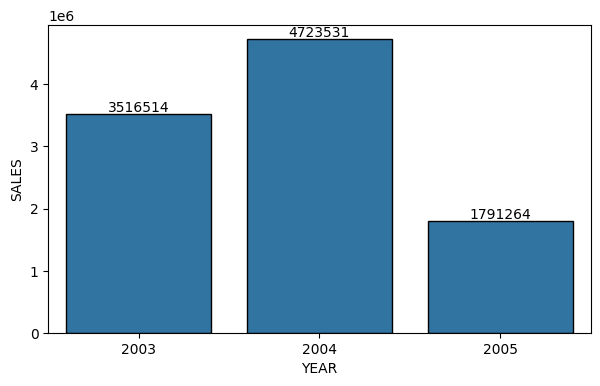

In [109]:
sales_data = df.groupby(["YEAR_ID"],as_index=False)["SALES"].sum().sort_values(by="SALES",ascending=True)
plt.figure(figsize=(7,4))
ax=sns.barplot(x="YEAR_ID",y="SALES",data=sales_data,edgecolor="black")
plt.xlabel("YEAR")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")


# Sales by months

Text(0.5, 0, 'Month')

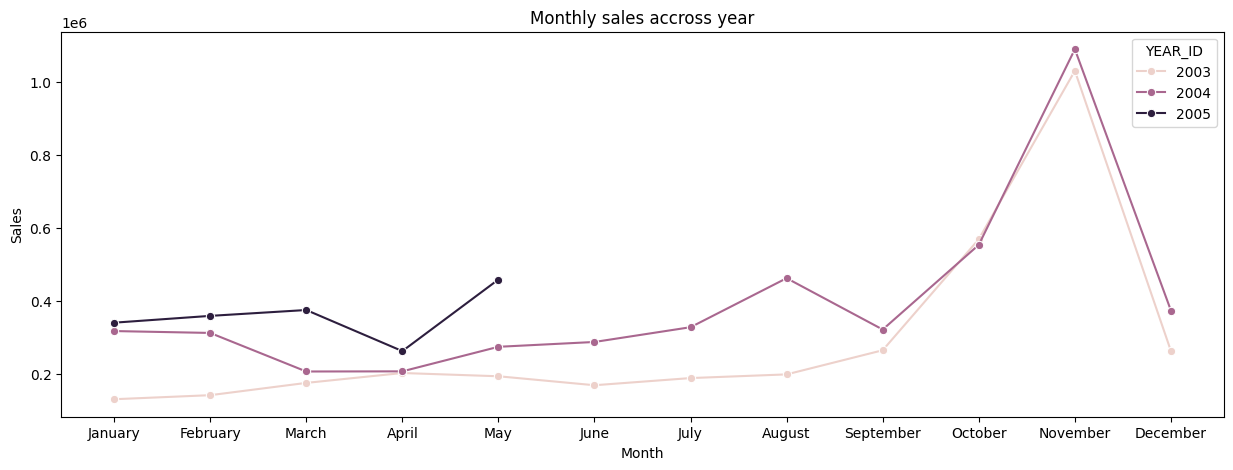

In [111]:
Month_data=df.groupby(["MONTH","MONTH_ID","YEAR_ID"],as_index=False).agg({"SALES":"sum"}).sort_values(by="MONTH_ID",ascending=True)
plt.figure(figsize=(15,5))
sns.lineplot(data=Month_data,x="MONTH",y="SALES",hue="YEAR_ID",marker="o",)
plt.title("Monthly sales accross year")
plt.ylabel("Sales")
plt.xlabel("Month")

#### from above charts we can see that sales improved from 2003 to 2004 and November have highest sales in both year but data is not complete for 2005

# Sales by Dealsize & Product Line

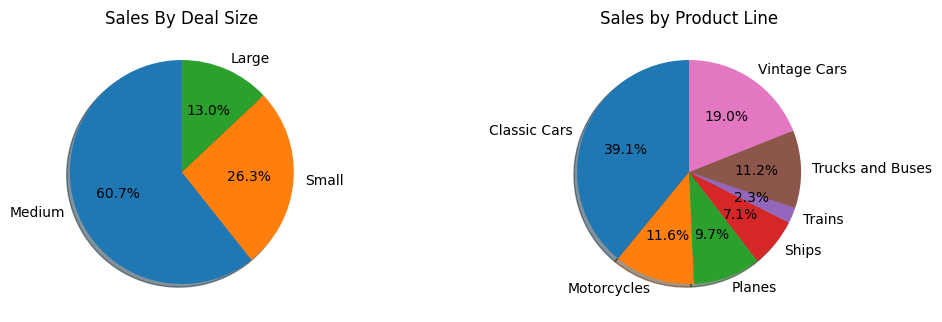

In [112]:
dealsize_data = df.groupby("DEALSIZE", as_index=False)["SALES"].sum().sort_values(by="SALES", ascending=False)
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title("Sales By Deal Size")
plt.pie(dealsize_data["SALES"], labels=dealsize_data["DEALSIZE"], autopct='%1.1f%%',startangle=90,shadow=True)


productline=df.groupby("PRODUCTLINE",as_index=False)["SALES"].sum()
plt.subplot(2,2,2)
plt.title("Sales by Product Line")
plt.pie(productline["SALES"],labels=productline["PRODUCTLINE"],autopct="%1.1f%%",startangle=90,shadow=True)
plt.show()

#### from above charts we can see that medium category  and classic cars have highest sales.

# Sales by Day of the Week

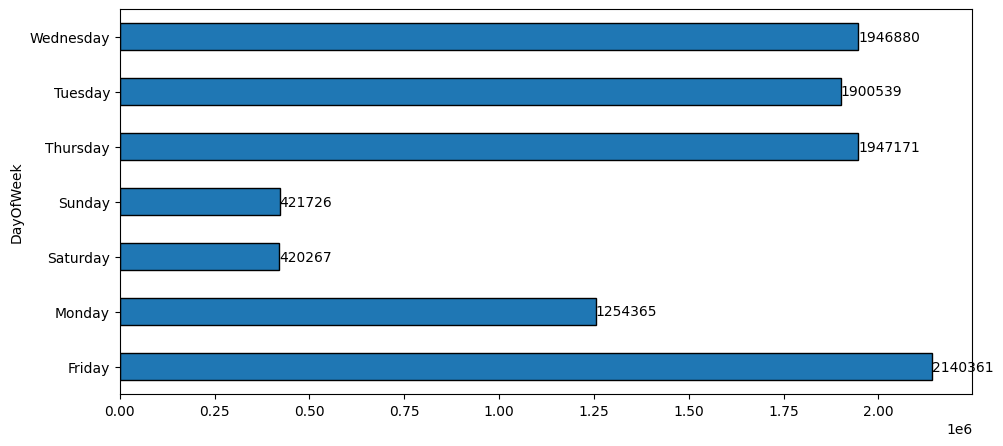

In [113]:
plt.figure(figsize=(11,5))
df['DayOfWeek'] = df['ORDERDATE'].dt.day_name()
day = df.groupby('DayOfWeek')['SALES'].sum()
ax=day.plot(kind='barh',edgecolor="black")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")


#### from above chart we can see that friday have highest sales and weekends have lowest among all

# Top 5 customers

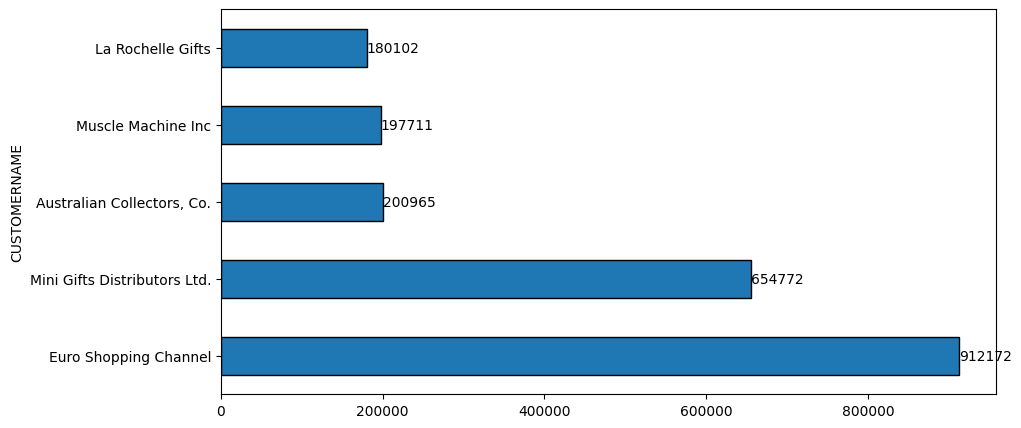

In [114]:
plt.figure(figsize=(10,5))
customer = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(5)
ax=customer.plot(kind='barh',edgecolor="black")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")


#### from above chart we can see that Euro Shopping Channel is our No1 client

# Top 5 Products by Sales and Quantity Ordered

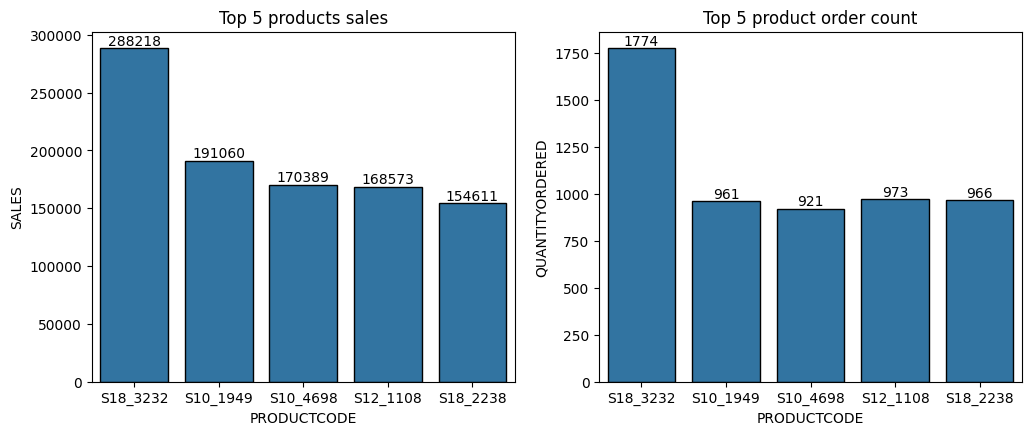

In [119]:
products = df.groupby('PRODUCTCODE',as_index=False).agg({'SALES': 'sum', 'QUANTITYORDERED': 'sum'}).sort_values(by='SALES', ascending=False).head(5)
plt.figure(figsize=(12,10))
#sales
plt.subplot(2,2,1)
plt.title("Top 5 products sales")
ax1=sns.barplot(x=products["PRODUCTCODE"],y=products["SALES"],edgecolor="black")
for bars in ax1.containers:
    ax1.bar_label(bars,fmt="%.0f")

#orders
plt.subplot(2,2,2)
plt.title("Top 5 product order count")
ax2=sns.barplot(x=products["PRODUCTCODE"],y=products["QUANTITYORDERED"],edgecolor="black")
for bars in ax2.containers:
    ax2.bar_label(bars,fmt="%.0f")


#### From above chart we can see that S18_3232, S10_1949 and S10_4698 are top 3 products sold 

# Top 5 sales of countries, cities and states

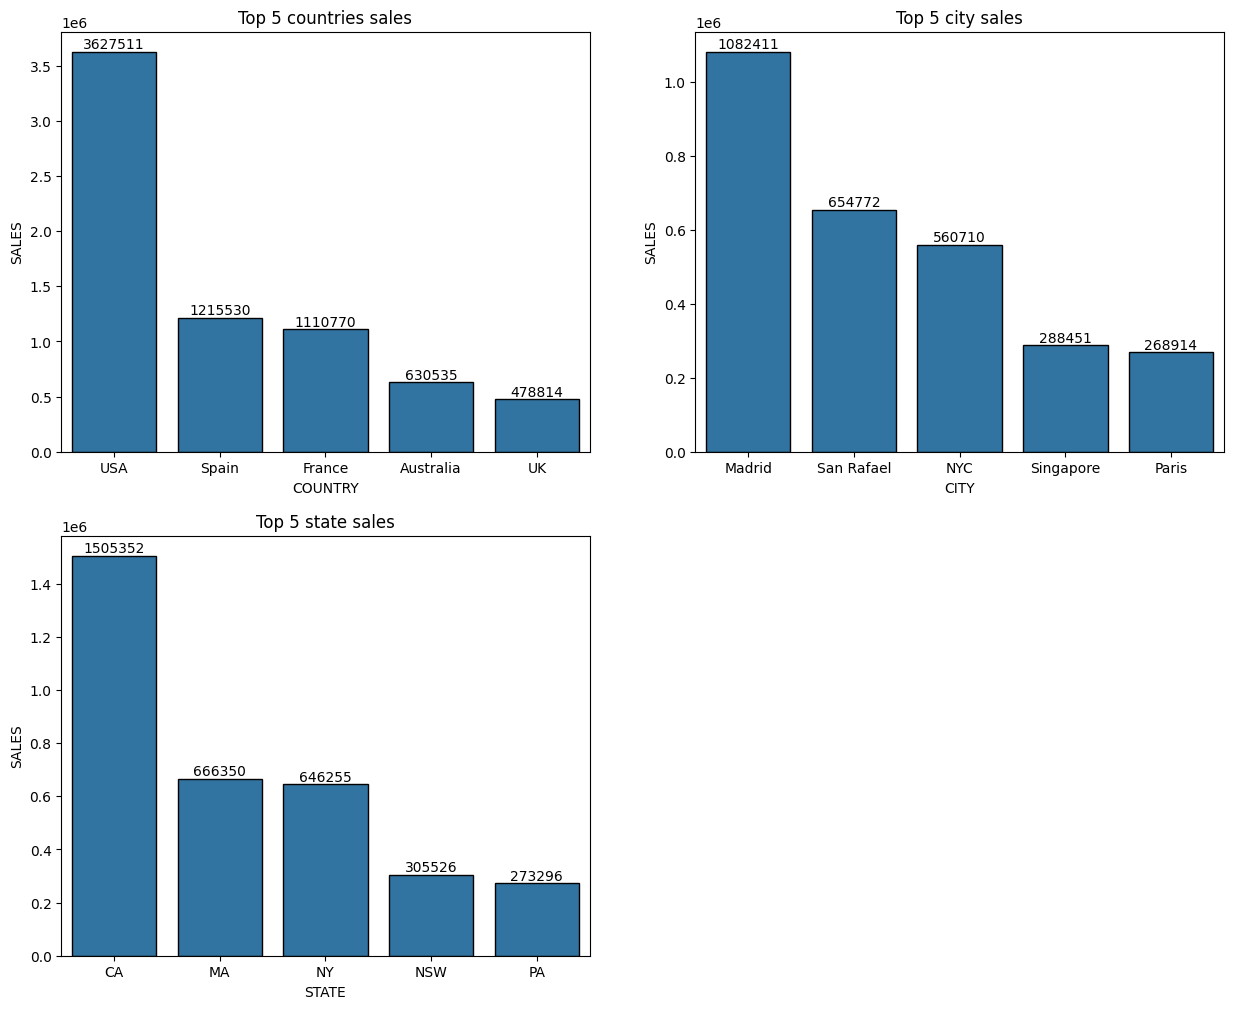

In [116]:
plt.figure(figsize=(15,12))

# country sales
country=df.groupby("COUNTRY",as_index=False)["SALES"].sum().sort_values(by="SALES",ascending=False).head(5)
plt.subplot(2,2,1)
ax=sns.barplot(x="COUNTRY",y="SALES",data=country,edgecolor="black")
plt.title("Top 5 countries sales")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f")
    
# city sales
city=df.groupby("CITY",as_index=False)["SALES"].sum().sort_values(by="SALES",ascending=False).head(5)
plt.subplot(2,2,2)
ax2=sns.barplot(x="CITY",y="SALES",data=city,edgecolor="black")
plt.title("Top 5 city sales")
for bars in ax2.containers:
    ax2.bar_label(bars,fmt="%.0f")
    
# states sales
state=df[df["STATE"]!="Unknown"].groupby("STATE",as_index=False)["SALES"].sum().sort_values(by="SALES",ascending=False).head(5)
plt.subplot(2,2,3)
ax3=sns.barplot(x="STATE",y="SALES",data=state,edgecolor="black")
plt.title("Top 5 state sales")
for bars in ax3.containers:
    ax3.bar_label(bars,fmt="%.0f")

### conclusion

The analysis highlights that focusing on top-performing countries, states, and cities, particularly during November, could increase future sales.

Fixing data gaps and focus on key trends, such as high sales on Fridays and the strong performance of Classic Cars, will also give greater impact on sales